# Data Description
groupId - Integer ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.<br>
matchId - Integer ID to identify match. There are no matches that are in both the training and testing set.<br>
assists - Number of enemy players this player damaged that were killed by teammates.<br>
boosts - Number of boost items used.<br>
damageDealt - Total damage dealt. Note: Self inflicted damage is subtracted.<br>
DBNOs - Number of enemy players knocked.<br>
headshotKills - Number of enemy players killed with headshots.<br>
heals - Number of healing items used.<br>
killPlace - Ranking in match of number of enemy players killed.<br>
killPoints - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.)<br>
kills - Number of enemy players killed.<br>
killStreaks - Max number of enemy players killed in a short amount of time.<br>
longestKill - Longest distance between player and player killed at time of death. This may be misleading, as downing a - player and driving away may lead to a large longestKill stat.<br>
maxPlace - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.<br>
numGroups - Number of groups we have data for in the match.<br>
revives - Number of times this player revived teammates.<br>
rideDistance - Total distance traveled in vehicles measured in meters.<br>
roadKills - Number of kills while in a vehicle.<br>
swimDistance - Total distance traveled by swimming measured in meters.<br>
teamKills - Number of times this player killed a teammate.<br>
vehicleDestroys - Number of vehicles destroyed.<br>
walkDistance - Total distance traveled on foot measured in meters.<br>
weaponsAcquired - Number of weapons picked up.<br>
winPoints - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.)<br>
winPlacePerc - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.<br>

In [2]:
import pandas as pd
df=pd.read_csv('C:\\Users\\nEW u\\Desktop\\innomatics\\Task_11\\\data (2).csv')
df.head()

Unnamed: 0              Id         groupId         matchId  assists  \
0     2093518  a3e3cea9f2e314  c9f6eaa81245b5  a3d8693390584c        0   
1     3701672  43e4be7ad72cc7  521836de101ee8  b65de9055327e0        0   
2     2059784  9a68690e31fdff  4a72ffa2cebd90  d6aad3f9830e60        0   
3     1302036  b147e1bd448fc4  9a8991656b3fea  d931c0932d8aca        0   
4      297180  d818b4edd59612  eece87c8b846b3  ec2b5ed94baae3        0   

   boosts  damageDealt  DBNOs  headshotKills  heals  ...  revives  \
0       0        25.93      0              0      0  ...        0   
1       0        36.71      0              0      0  ...        0   
2       1        47.73      0              0      0  ...        0   
3       0         0.00      0              0      0  ...        1   
4       2       100.00      0              0      3  ...        0   

   rideDistance  roadKills  swimDistance  teamKills  vehicleDestroys  \
0           0.0          0           0.0          0                0   
1           0.0          0           0.0          0                0   
2        4088.0          0           0.0          0                0   
3           0.0          0           0.0          0                0   
4         918.4          0           0.0          0                0   

  walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0       151.30                1       1525        0.0667  
1      1918.00                7       1516        0.5862  
2       820.00                7          0        0.8105  
3        38.81                0       1515        0.5556  
4      1721.00                5          0        0.6429  

[5 rows x 30 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [4]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
sns.set_style(style='darkgrid')

In [6]:
print("The average person kills {:.2f} players, 99% of people have {} kills or less, while the most kills ever recorded is {}.".format(df['kills'].mean(),df['kills'].quantile(0.99), df['kills'].max()))

The average person kills 0.93 players, 99% of people have 7.0 kills or less, while the most kills ever recorded is 72.


# Let's plot the kill counts.

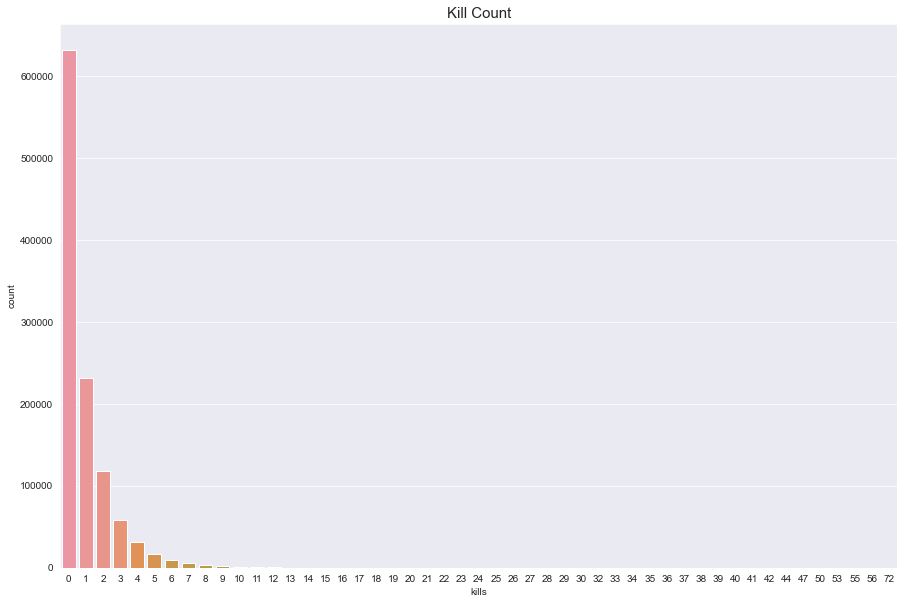

In [7]:
data=df.copy()
plt.figure(figsize=(15,10))
sns.countplot(data['kills'].sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

### Most peaple can't make a single kill. Let's see do they can damage

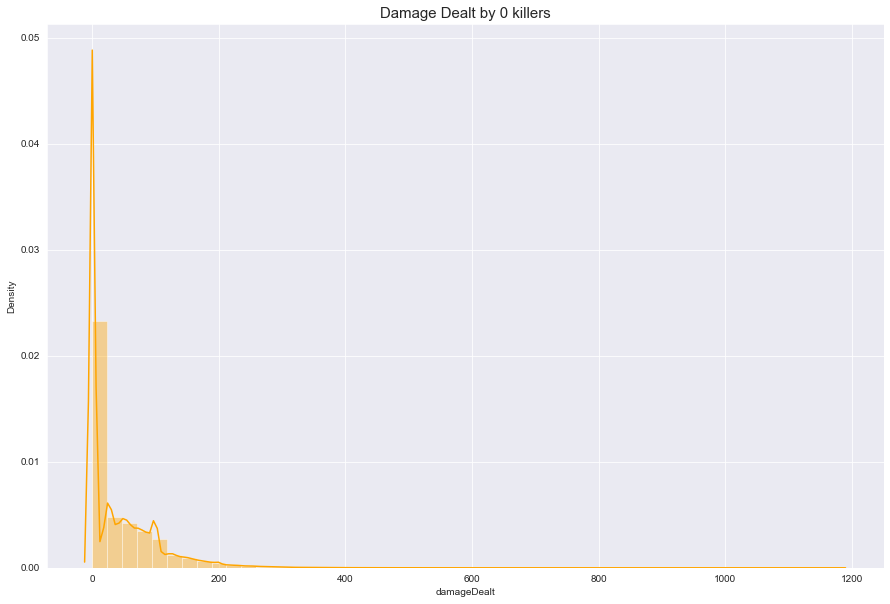

In [8]:
data = data[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(data['damageDealt'], color='orange')
plt.show()

### Well, most of them don't damaged. Let's investigate the exceptions.

In [9]:
print("{} players ({:.2f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(df)))

data1 = df[df['damageDealt'] == 0].copy()
print("{} players ({:.2f}%) have won without dealing damage!".format(len(data1[data1['winPlacePerc']==1]), 100*len(data1[data1['winPlacePerc']==1])/len(df)))

4197 players (0.38%) have won without a single kill!
1199 players (0.11%) have won without dealing damage!


### Plot win placement percentage vs kills.

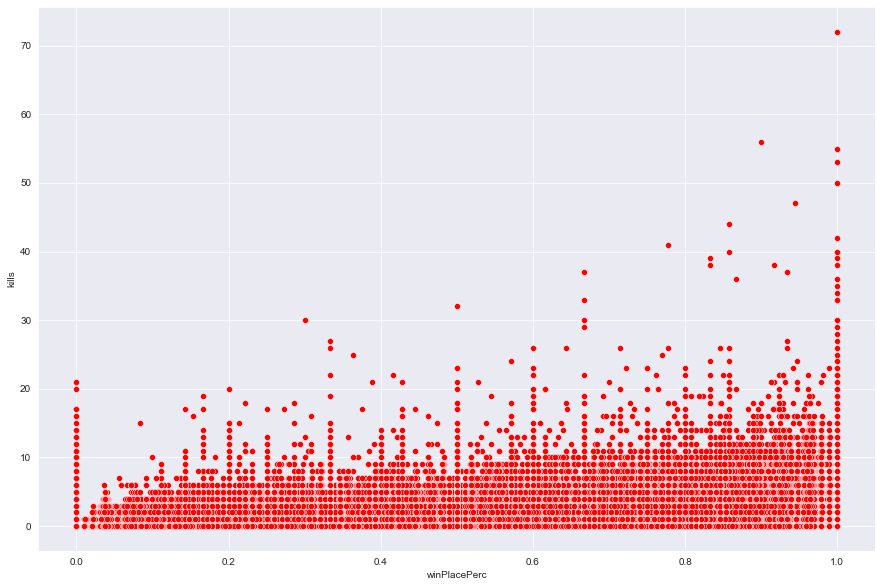

In [10]:
plt.figure(figsize=(15,10))
sns.scatterplot(x="winPlacePerc", y="kills", data=df,  color="r")
plt.show()

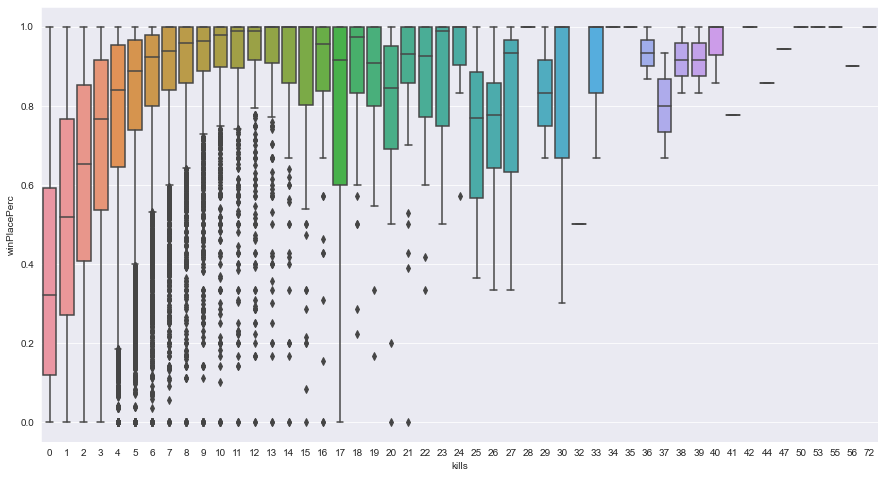

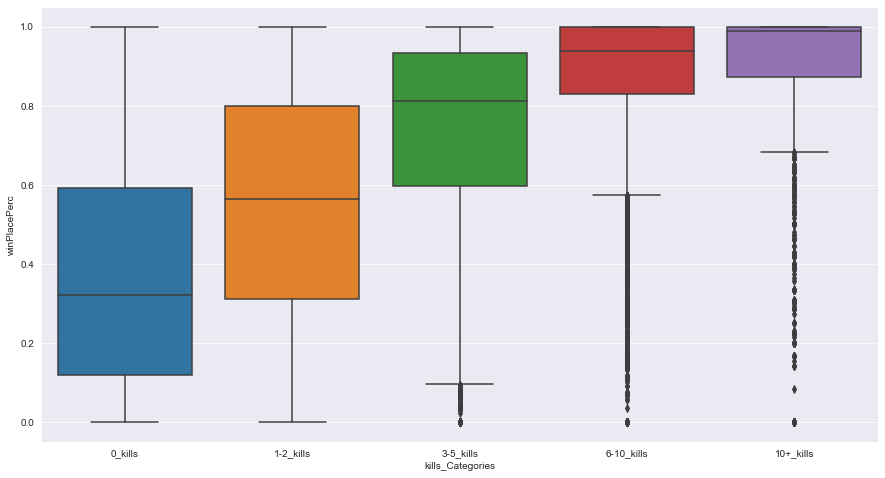

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(x='kills', y="winPlacePerc", data=df)
plt.show()

# Lets decorate the. 

kills = df.copy()

kills['kills_Categories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="kills_Categories", y="winPlacePerc", data=kills)
plt.show()

# The Runnes!!

In [12]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the marathoner champion walked for {}m.".format(df['walkDistance'].mean(), df['walkDistance'].quantile(0.99), df['walkDistance'].max()))

The average person walks for 1153.3m, 99% of people have walked 4393.0m or less, while the marathoner champion walked for 13960.0m.


In [13]:
df.shape

(1111742, 30)

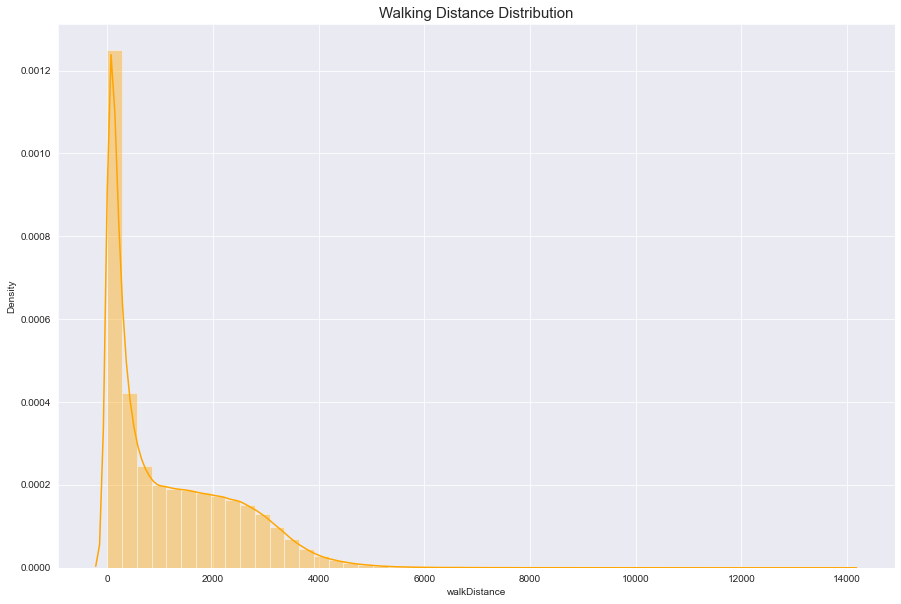

In [14]:
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(df['walkDistance'], color='orange')
plt.show()

In [15]:
print("{} players ({:.2f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(df)))

24556 players (2.21%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


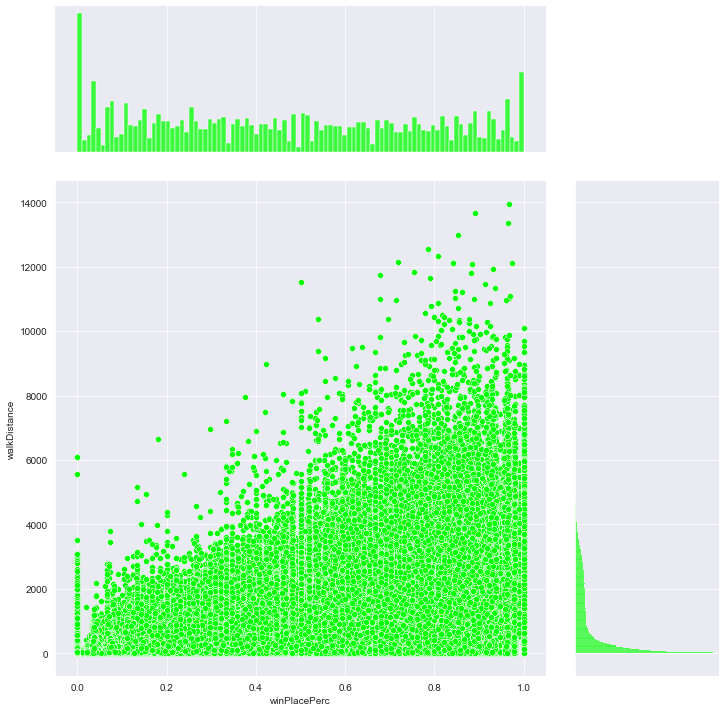

In [16]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="lime")
plt.show()

### Apparently walking has a high correlation with winPlacePerc.

# The Drivers

In [17]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(df['rideDistance'].mean(), df['rideDistance'].quantile(0.99), df['rideDistance'].max()))

The average person drives for 604.2m, 99% of people have drived 6968.0m or less, while the formula 1 champion drived for 35400.0m.


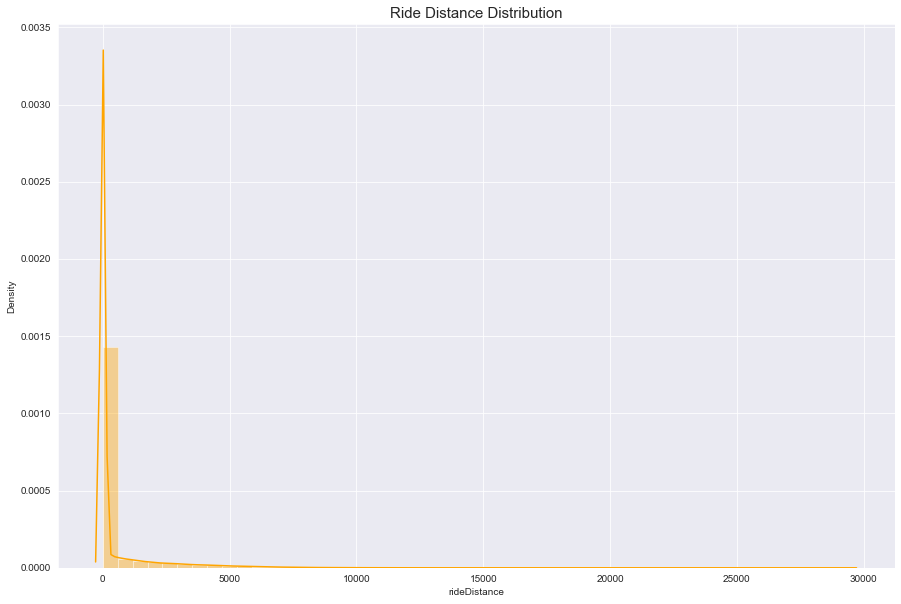

In [18]:
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'], color='orange')
plt.show()

In [19]:
print("{} players ({:.2f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data1[data1['rideDistance']==0])/len(df)))

500921 players (23.08%) drived for 0 meters. This means that they don't have a driving licence yet.


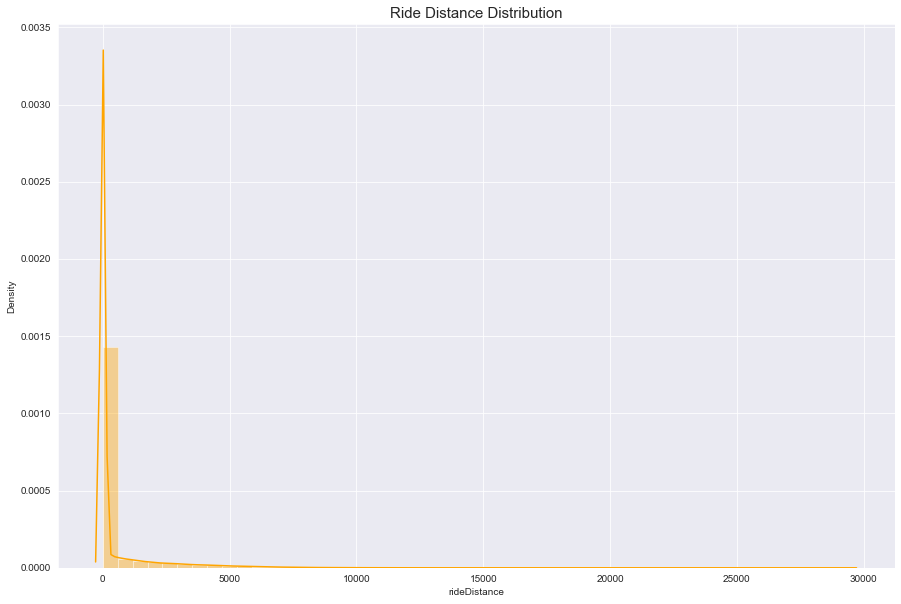

In [20]:
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'], color='orange')
plt.show()

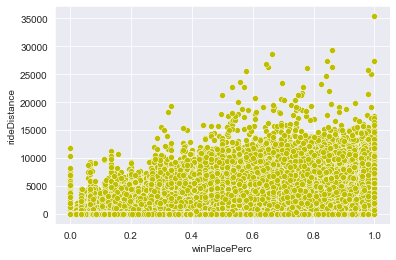

In [21]:
sns.scatterplot(x="winPlacePerc", y="rideDistance", data=df,  color="y")
plt.show()

There is a small correlation between rideDistance and winPlacePerc.

Destroying a vehicle shows that a players has skills!. <br>
Let's Check!!

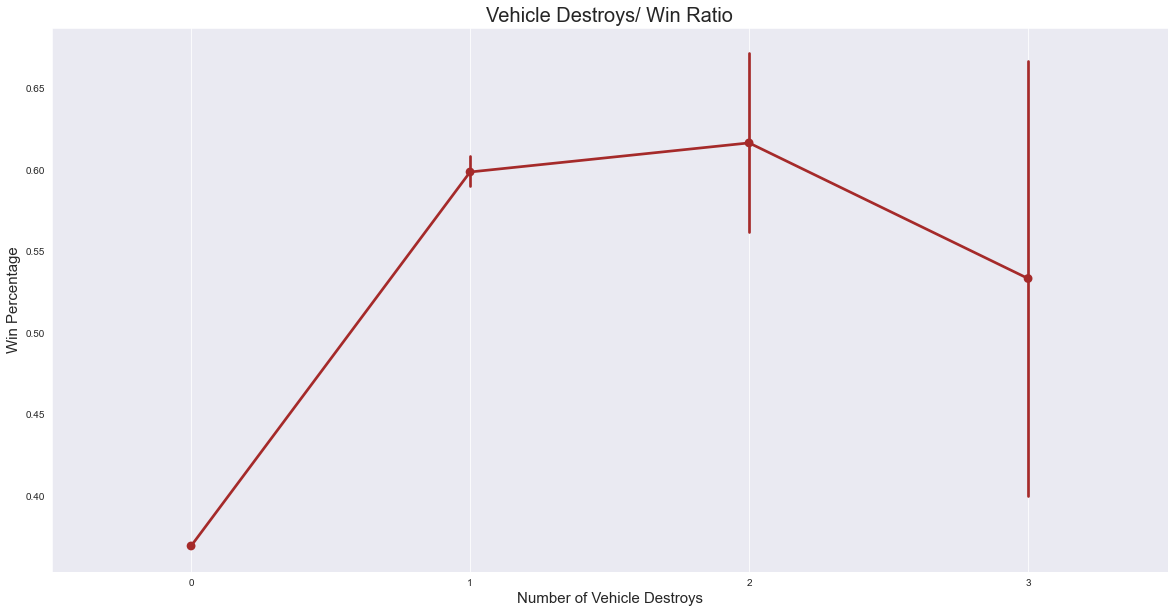

In [22]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='brown',alpha=0.8)
plt.xlabel('Number of Vehicle Destroys',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20)
plt.grid()
plt.show()

Hence!! Destroying a single vehicle increases your chances of winning!

# The Swimmers

In [23]:
print("The average person swims for {:.1f}m, 99% of people have swimemd {}m or less, while the olympic champion swimmed for {}m.".format(df['swimDistance'].mean(), df['swimDistance'].quantile(0.99), df['swimDistance'].max()))

The average person swims for 4.5m, 99% of people have swimemd 123.3m or less, while the olympic champion swimmed for 2668.0m.


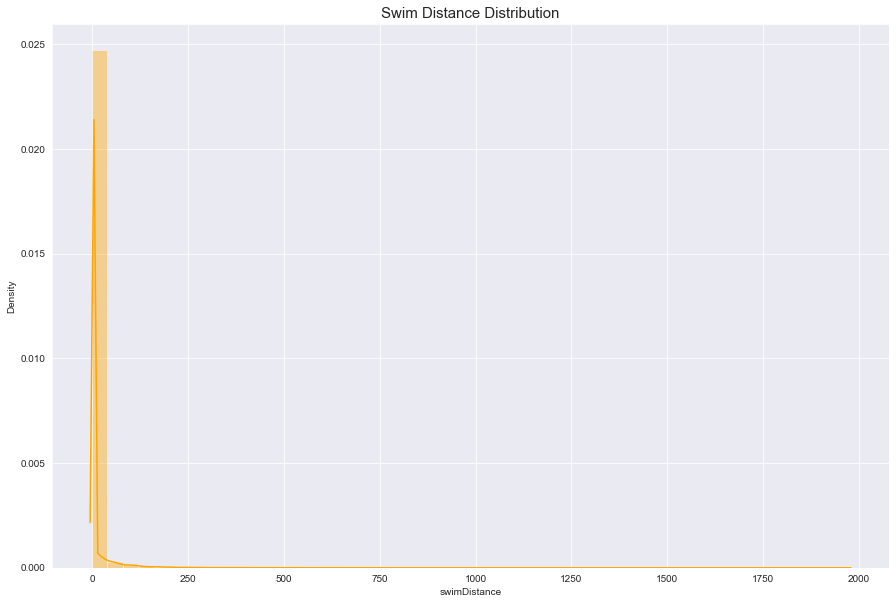

In [24]:
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(data['swimDistance'], color='orange')
plt.show()

Oh!! Almost no one swims. Let's group the swimming distances in 4 categories and plot vs winPlacePerc.

In [25]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(df['heals'].mean(), df['heals'].quantile(0.99), df['heals'].max()))
print()
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(df['boosts'].mean(), df['boosts'].quantile(0.99), df['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 73.

The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 24.


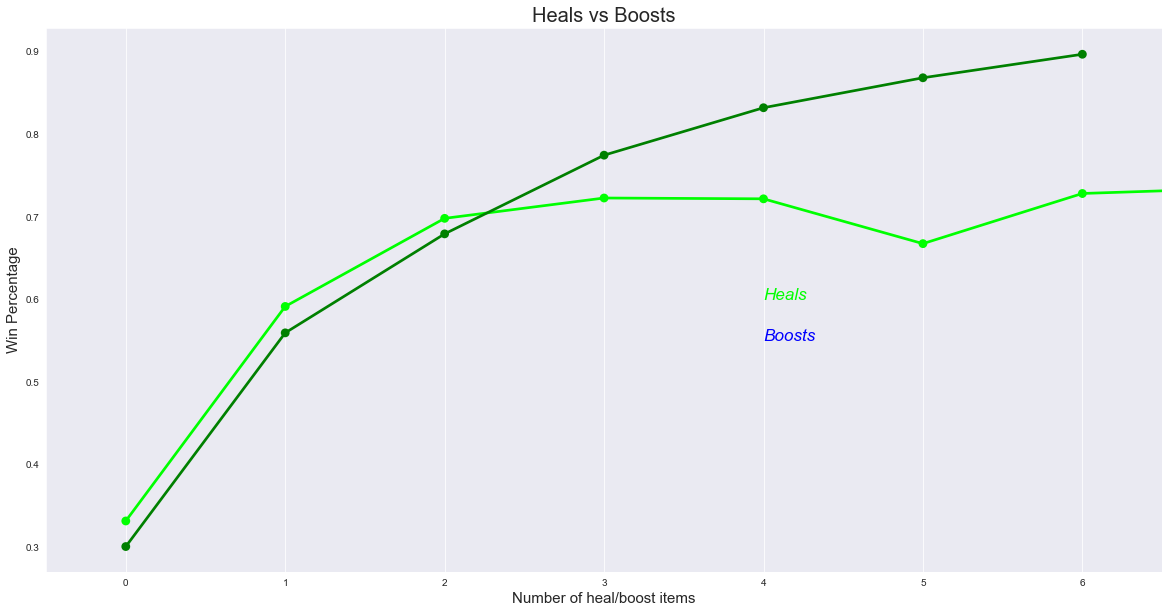

In [26]:
data = df.copy()
data = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='green',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Heals vs Boosts',fontsize = 20)
plt.grid()
plt.show()

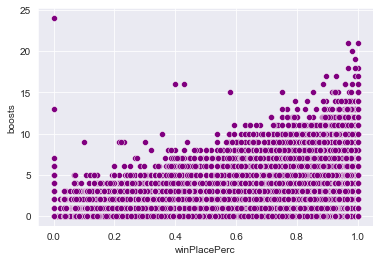

In [27]:
sns.scatterplot(x="winPlacePerc", y="boosts", data=df,  color="purple")
plt.show()

So healing and boosting, definitely are correlated with winPlacePerc. Boosting is more.

# Solos, Duos and Squads
There are 3 game modes in the game. One can play solo, or with a friend (duo), or with 3 other friends (squad). 100 players join the same server, so in the case of duos the max teams are 50 and in the case of squads the max teams are 25.

In [29]:
solos = df[df['numGroups']>50]
duos = df[(df['numGroups']>25) & (df['numGroups']<=50)]
squads = df[df['numGroups']<=25]
print("There are {} ({:.2f}%) solo games, {} ({:.2f}%) duo games and {} ({:.2f}%) squad games.".format(len(solos), 100*len(solos)/len(df), len(duos), 100*len(duos)/len(df), len(squads), 100*len(squads)/len(df)))

There are 177161 (15.94%) solo games, 824015 (74.12%) duo games and 110566 (9.95%) squad games.


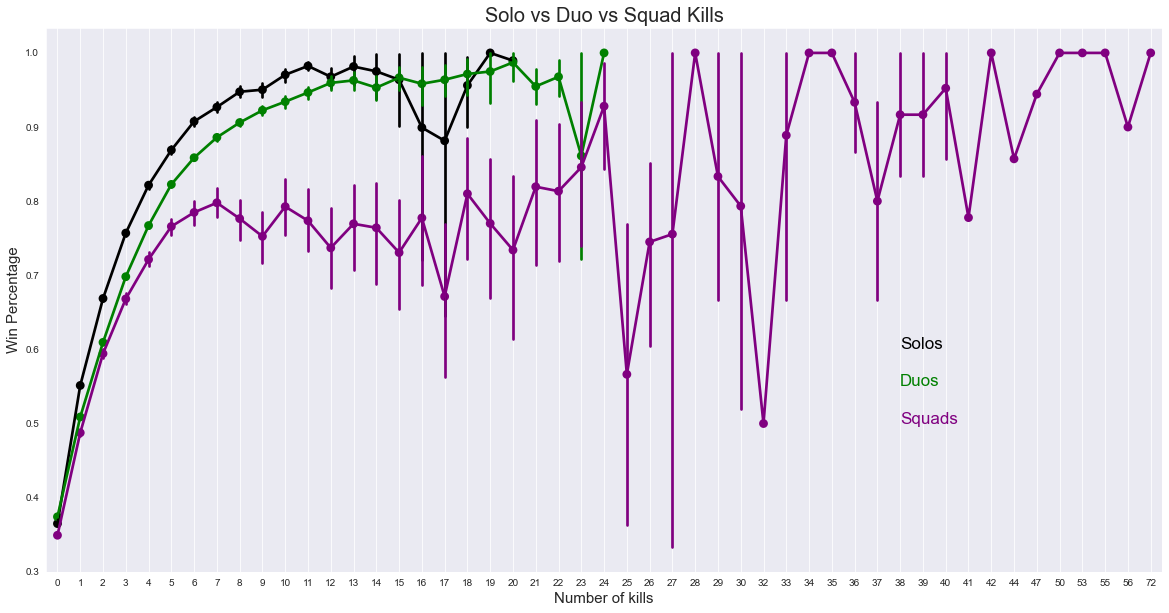

In [31]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='green',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='purple',alpha=0.8)
plt.text(37,0.6,'Solos',color='black',fontsize = 17)
plt.text(37,0.55,'Duos',color='green',fontsize = 17)
plt.text(37,0.5,'Squads',color='purple',fontsize = 17)
plt.xlabel('Number of kills',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20)
plt.grid()
plt.show()

Hmm, very interesting. Solos and duos behave the same, but when playing squads kills don't matter that much.
<br><br>
The attribute DBNOs means enemy players knocked. A "knock" can happen only in duos or squads, because the teammates have the chance to "revive" the knocked player in a given time. So a knocked player can be revived or die. If he is revived, the next time he will be knocked, his teammates will have less time to revive him.
<br><br>
The attribute assist can also happen only in duos or squads. It generally means that the player had an involvement in a kill.
<br>
The attribute revive also happens in duos or squads.

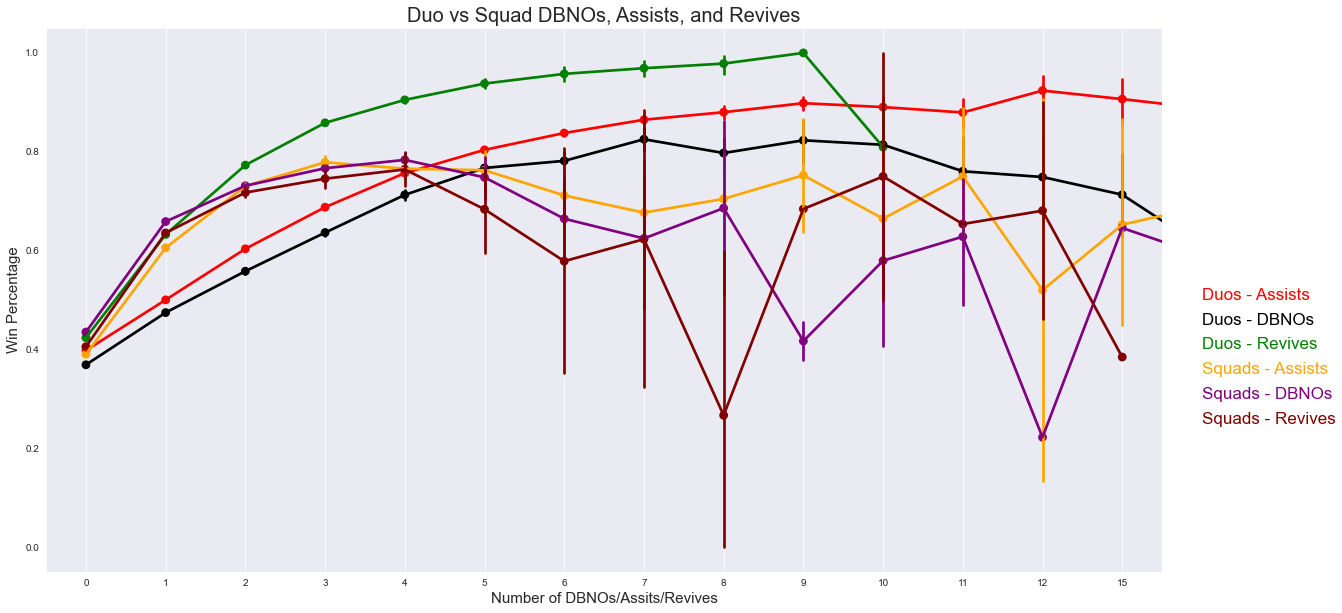

In [32]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='DBNOs',y='winPlacePerc',data=duos,color='red',alpha=0.8)
sns.pointplot(x='DBNOs',y='winPlacePerc',data=squads,color='black',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=duos,color='green',alpha=0.8)
sns.pointplot(x='assists',y='winPlacePerc',data=squads,color='orange',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=duos,color='purple',alpha=0.8)
sns.pointplot(x='revives',y='winPlacePerc',data=squads,color='maroon',alpha=0.8)
plt.text(14,0.5,'Duos - Assists',color='red',fontsize = 17)
plt.text(14,0.45,'Duos - DBNOs',color='black',fontsize = 17)
plt.text(14,0.4,'Duos - Revives',color='green',fontsize = 17)
plt.text(14,0.35,'Squads - Assists',color='orange',fontsize = 17)
plt.text(14,0.3,'Squads - DBNOs',color='purple',fontsize = 17)
plt.text(14,0.25,'Squads - Revives',color='maroon',fontsize = 17)
plt.xlabel('Number of DBNOs/Assits/Revives',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Duo vs Squad DBNOs, Assists, and Revives',fontsize = 20)
plt.grid()
plt.show()

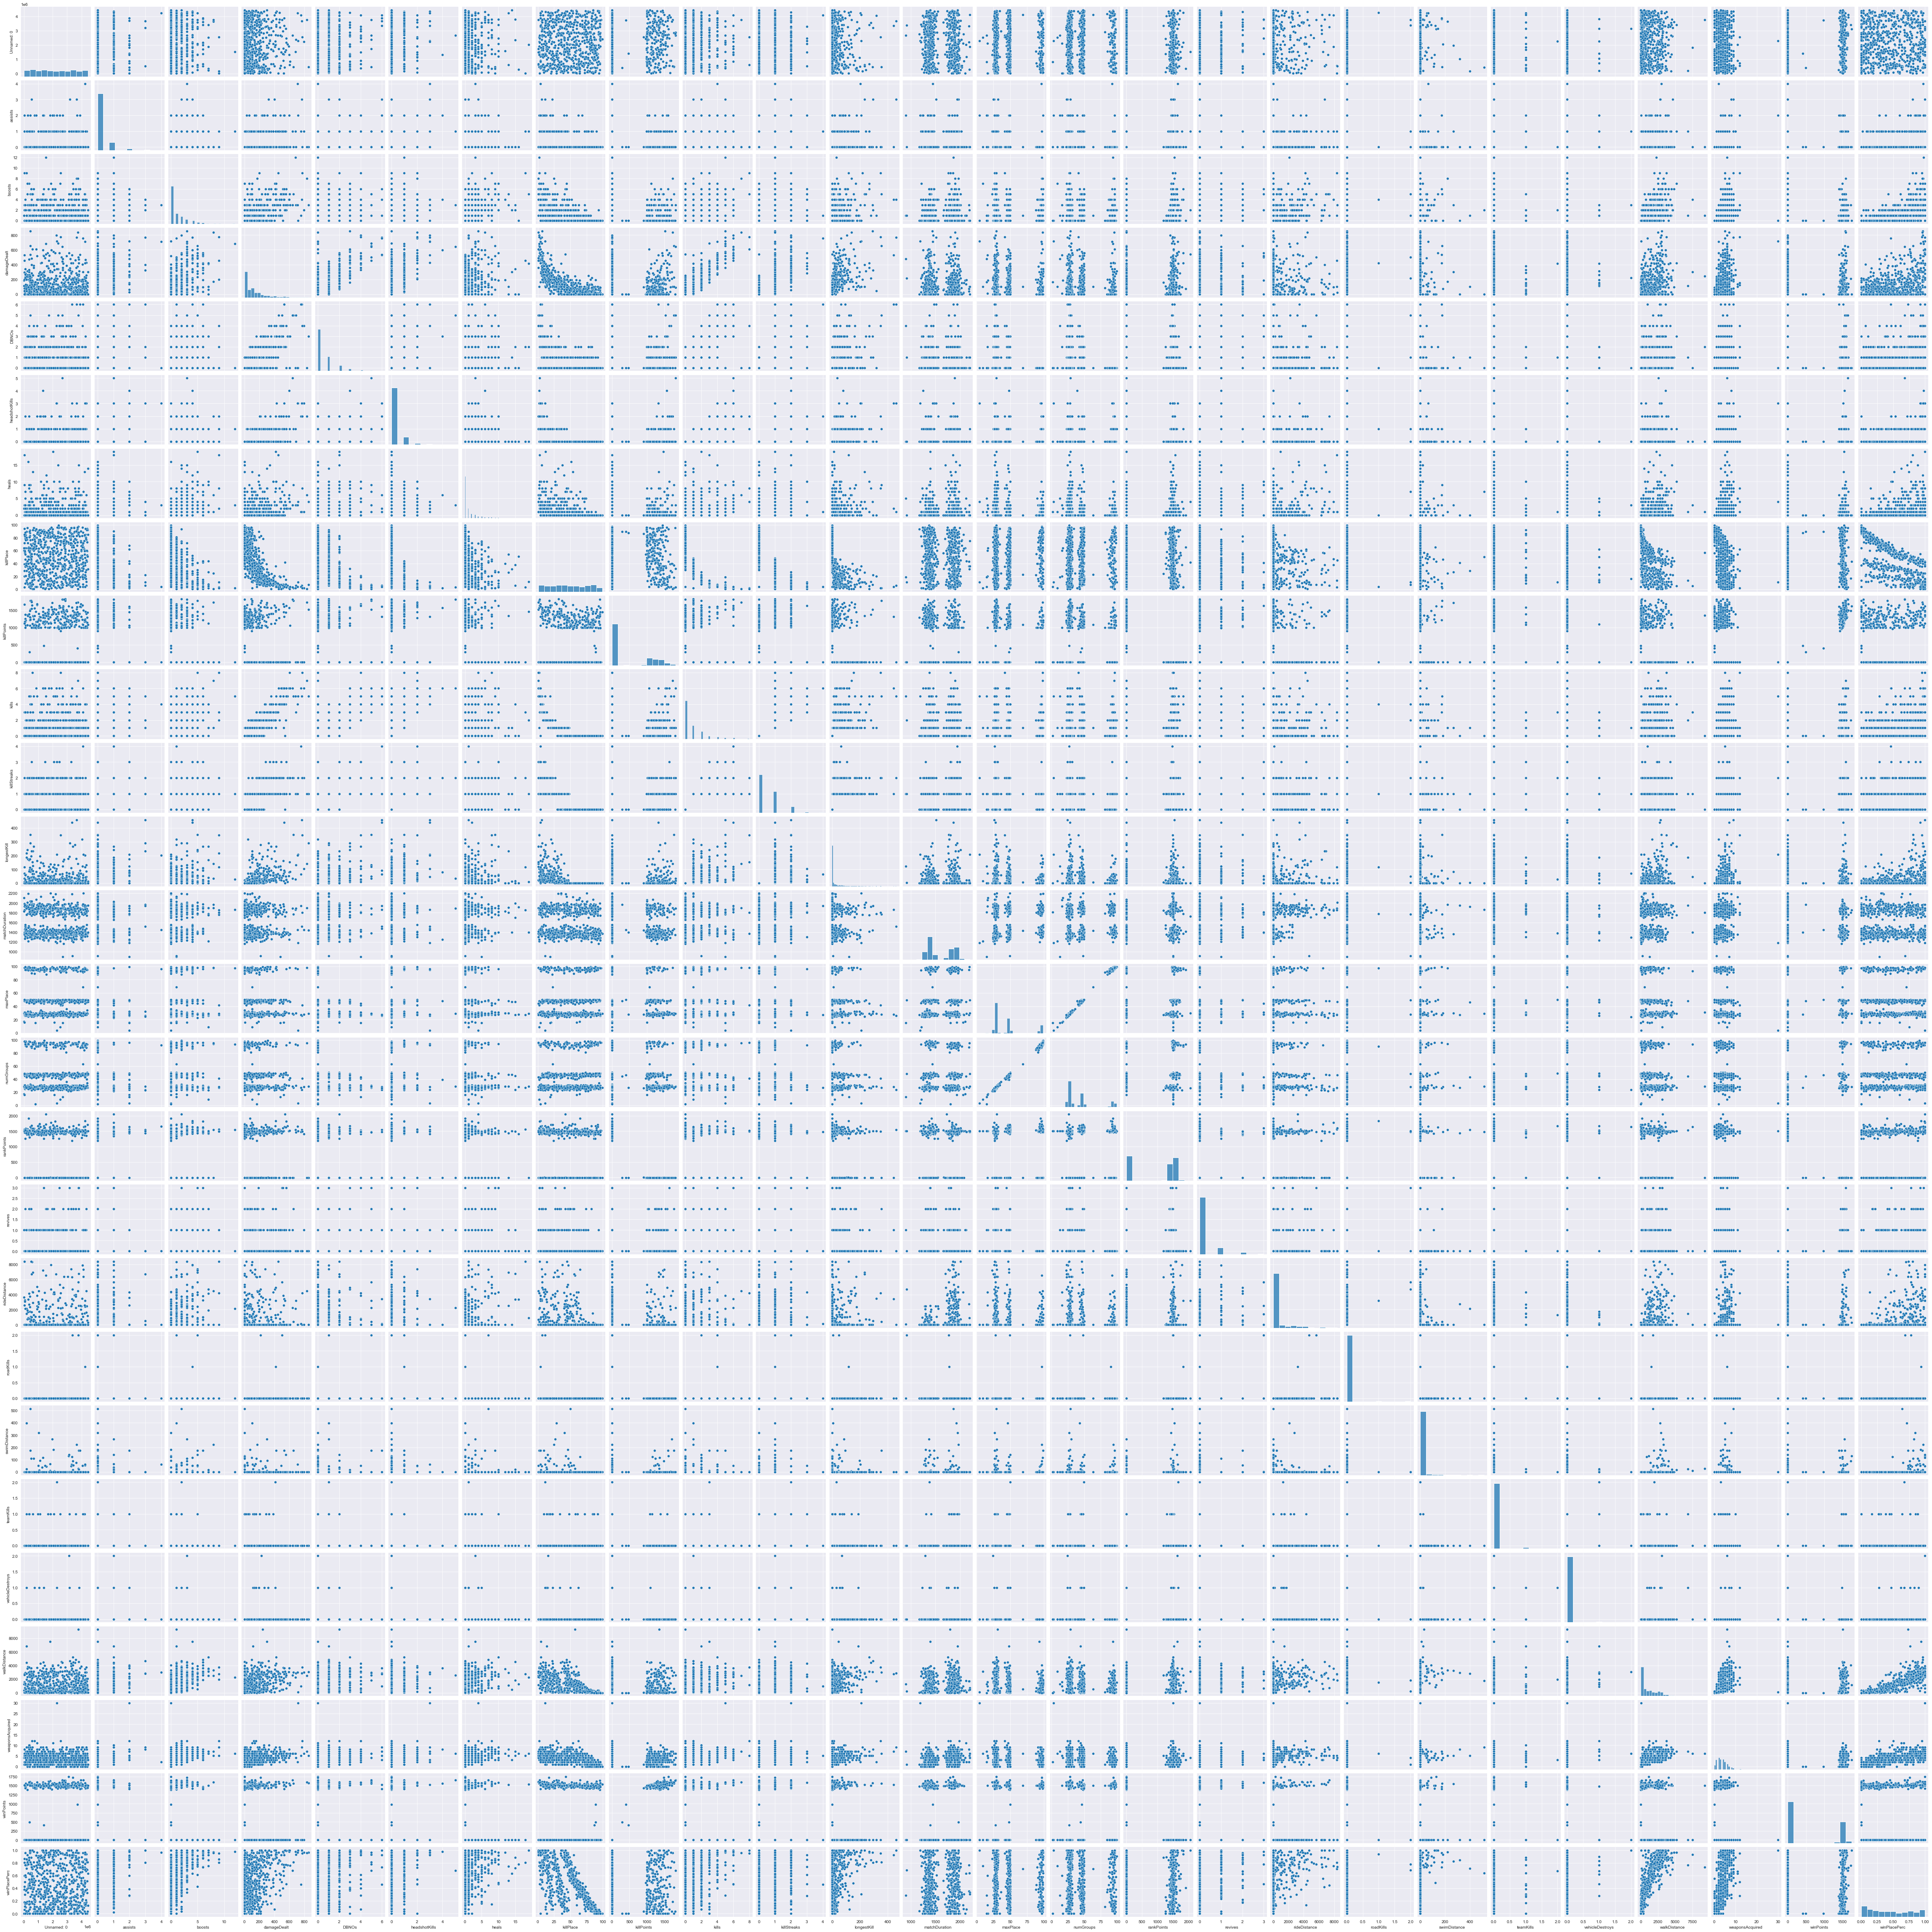

In [34]:
sns.pairplot(df.head(700))

In [35]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [36]:
df_cat = df.select_dtypes(include='object')
print(df_cat.columns)

Index(['Id', 'groupId', 'matchId', 'matchType'], dtype='object')


In [37]:
df_cat['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)